In [1]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv("/content/drive/My Drive/ColabNotebooks/MachineLearning/Linear_regression/Salary_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


#Checking the Null values in the dataset

In [7]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.index.name = 'id'

In [9]:
df.head()

,Unnamed: 0,YearsExperience,Salary
id,,,
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [11]:
df.shape

(30, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [13]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


#Transpose of the dataset:

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


#Reshaping the values

In [15]:
x = df.iloc[:,1:2].values # iloc[:,1:2]return dataframe..values giving me a 2 dimensional(matrix) structured data.
y = df.iloc[:,-1].values # .values return the array.

In [16]:
x[:5]

array([[1.2],
       [1.4],
       [1.6],
       [2.1],
       [2.3]])

In [17]:
y[:5]

array([39344., 46206., 37732., 43526., 39892.])

#Ploting the values in the scatter plot

# 1. Linear Relationship

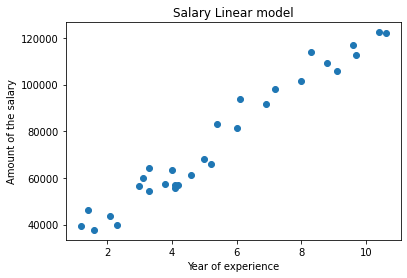

In [19]:
plt.title('Salary Linear model')
plt.xlabel('Year of experience')
plt.ylabel('Amount of the salary')
plt.scatter(df.YearsExperience, df.Salary)

#Spliting the data into train and test data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['YearsExperience']]
y = df['Salary']
X_train,X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Assigning the LinearRegression function into a variable

In [22]:
model = LinearRegression()
#Training the model
model.fit(X_train, y_train)

LinearRegression()

#Ploting the interceptor in scatter plot

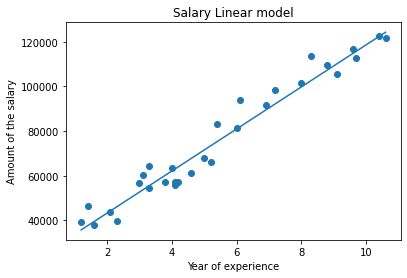

In [25]:
plt.title('Salary Linear model')
plt.xlabel('Year of experience')
plt.ylabel('Amount of the salary')
plt.scatter(df.YearsExperience, df.Salary)
plt.plot(df.YearsExperience, model.predict(df[['YearsExperience']]))

#Coefficient of the model

In [27]:
model.coef_

array([9423.81532303])

In [28]:
X_train.shape

(24, 1)

In [29]:
y_train.shape

(24,)

#Interceptor of the model

In [30]:
model.intercept_

24380.201479473704

#Testing the model with test dataset

In [31]:
model.predict(X_test)

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

#Measuring the accuracy of the model

In [32]:
model.score(X_test,y_test)

0.9024461774180497

In [33]:
model.score(X_test,y_test)*100

90.24461774180497